# Recurrent Neural Networks (RNNs) for Stock Price Prediction

## Table of Contents
1. **Introduction to RNNs**
   - What are RNNs?
   - Why Use RNNs?
   - Applications of RNNs
2. **RNN Architecture**
   - Basic RNN Structure
   - Vanishing Gradient Problem
   - Long Short-Term Memory (LSTM)
   - Gated Recurrent Units (GRU)
3. **Mathematics of RNNs**
   - Forward Propagation
   - Backpropagation Through Time (BPTT)
   - Loss Functions
4. **Challenges in Training RNNs**
   - Vanishing and Exploding Gradients
   - Overfitting
   - Sequence Length Limitations
5. **Building an RNN for Stock Price Prediction**
   - Data Preparation
   - Model Design
   - Training Loop
6. **Advanced RNN Variants**
   - Bidirectional RNNs
   - Stacked RNNs
   - Attention Mechanisms
7. **Practical Tips and Best Practices**
   - Hyperparameter Tuning
   - Debugging RNNs
   - Applications in Real-World Projects
8. **Conclusion**
   - Summary
   - Further Reading

---

## 1. Introduction to RNNs

### What are RNNs?
Recurrent Neural Networks (RNNs) are a class of neural networks designed for sequential data. Unlike feedforward networks, RNNs have connections that form directed cycles, allowing them to maintain a "memory" of previous inputs.

### Why Use RNNs?
1. **Sequential Data**: RNNs are ideal for tasks involving sequences, such as time series, text, and speech.
2. **Temporal Dependencies**: RNNs can capture dependencies across time steps.
3. **Variable-Length Inputs**: RNNs can handle inputs of varying lengths.

### Applications of RNNs
- **Natural Language Processing (NLP)**: Sentiment analysis, machine translation, text generation.
- **Time Series Prediction**: Stock price prediction, weather forecasting.
- **Speech Recognition**: Transcribing audio to text.

---

## 2. RNN Architecture

### Basic RNN Structure
- **Input**: A sequence of data (e.g., stock prices over time).
- **Hidden State**: Maintains information about previous time steps.
- **Output**: Predictions at each time step.

### Vanishing Gradient Problem
- Gradients can become very small during backpropagation, making it difficult for the network to learn long-term dependencies.
- **Solution**: Use LSTM or GRU units.

### Long Short-Term Memory (LSTM)
- **Memory Cell**: Stores information over long periods.
- **Gates**: Control the flow of information (input, forget, output gates).

### Gated Recurrent Units (GRU)
- Simplified version of LSTM with fewer parameters.
- Combines input and forget gates into a single "update gate."

---

## 3. Mathematics of RNNs

### Forward Propagation

For a basic RNN, the computations are as follows:

1. **Hidden State Update:**

h_t = activation( W_h * h_(t-1) + W_x * x_t + b_h )



2. **Output Calculation:**

y_t = activation( W_y * h_t + b_y )



**Where:**

- **h_t:** The hidden state at time t.
- **x_t:** The input at time t.
- **y_t:** The output at time t.
- **W_h, W_x, W_y:** The weight matrices.
- **b_h, b_y:** The bias terms.
- **activation:** The activation function (for example, tanh or ReLU).

### Backpropagation Through Time (BPTT)
- Extends backpropagation to sequence data.
- Computes gradients across multiple time steps.

### Loss Functions
- **Mean Squared Error (MSE)**: Used for regression tasks like stock price prediction.

---

## 4. Challenges in Training RNNs

### Vanishing and Exploding Gradients
- **Vanishing Gradients**: Gradients become too small, slowing down learning.
- **Exploding Gradients**: Gradients become too large, causing instability.
- **Solution**: Use gradient clipping or advanced RNN variants (LSTM, GRU).

### Overfitting
- RNNs can overfit to training data, especially with small datasets.
- **Solution**: Use dropout, regularization, or data augmentation.

### Sequence Length Limitations
- RNNs struggle with very long sequences due to memory constraints.
- **Solution**: Use attention mechanisms or transformer models.

---

## 5. Building an RNN for Stock Price Prediction



### Data Preparation

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.347168  24.817053  23.906233  24.805918  212818400
2015-01-05  23.661270  24.195737  23.474208  24.115567  257142000
2015-01-06  23.663500  23.924052  23.300507  23.725854  263188400
2015-01-07  23.995314  24.095525  23.761484  23.872831  160423600
2015-01-08  24.917271  24.975172  24.206875  24.324905  237458000


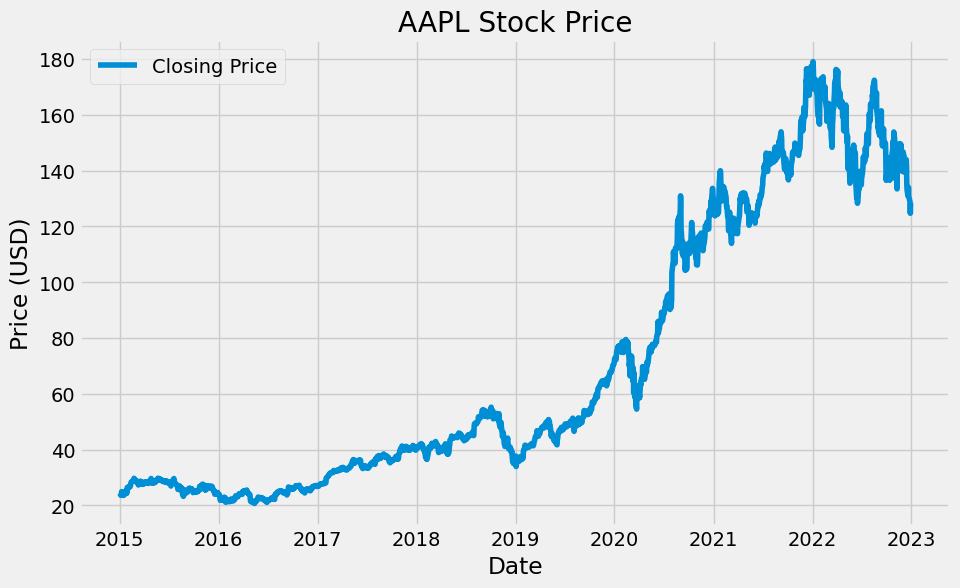

In [2]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler

# Download stock data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")
print(data.head())

# Plot closing prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


#### Explanation:
1. **Install `yfinance`**: A library to download stock data from Yahoo Finance.
2. **Download Data**: Fetch historical stock prices for Apple (AAPL) from 2015 to 2023.
3. **Plot Data**: Visualize the closing prices to understand the trend.


### Preprocessing

In [3]:
# Extract closing prices
prices = data['Close'].values.reshape(-1, 1)

In [4]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)


In [5]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day
X, y = create_sequences(scaled_prices, seq_length)


In [6]:
# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [7]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1563, 60, 1)
Testing data shape: (391, 60, 1)


#### Explanation:
1. **Extract Closing Prices**: Focus on the closing prices for prediction.
2. **Normalize Data**: Scale prices to the range [0, 1] for better model performance.
3. **Create Sequences**: Use 60 days of data to predict the next day's price.
4. **Split Data**: Divide the data into training (80%) and testing (20%) sets.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(seq_length, 1)),
    SimpleRNN(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,951 (34.96 KB)

 Trainable params: 8,951 (34.96 KB)

 Non-trainable params: 0 (0.00 B)

#### Explanation:
1. **LSTM Layers**: Use two LSTM layers to capture temporal dependencies.
2. **Dense Layers**: Add fully connected layers for final predictions.
3. **Compile Model**: Use the Adam optimizer and mean squared error loss for regression.


### Training Loop


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0290 - val_loss: 0.0029
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5009e-04 - val_loss: 0.0019
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0047e-04 - val_loss: 0.0018
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.3766e-04 - val_loss: 0.0032
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5554e-04 - val_loss: 0.0014
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8229e-04 - val_loss: 0.0010
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9484e-04 - val_loss: 9.6024e-04
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1463e-04 - val_loss: 9.2323e-04
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5910e-04 - val_loss: 0.0010
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8750e-04 - val_loss: 0.0014
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3983e-04 - val_loss: 0.0018
Epoch 12/20
49/

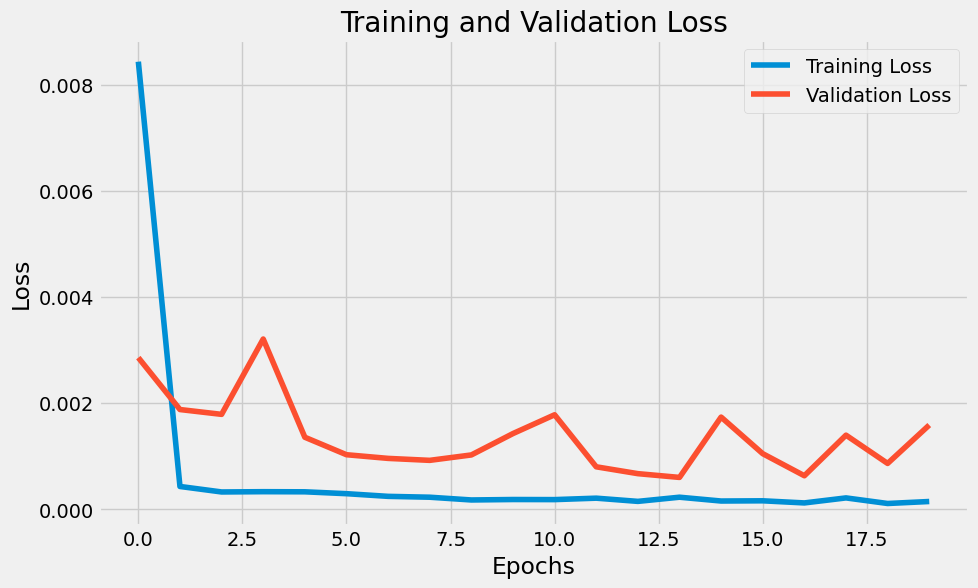

In [19]:

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#### Explanation:
1. **Train Model**: Fit the model on the training data for 20 epochs.
2. **Plot Loss**: Visualize the training and validation loss to check for overfitting.


### Predictions

In [20]:

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Rescale to original prices
y_test_actual = scaler.inverse_transform(y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


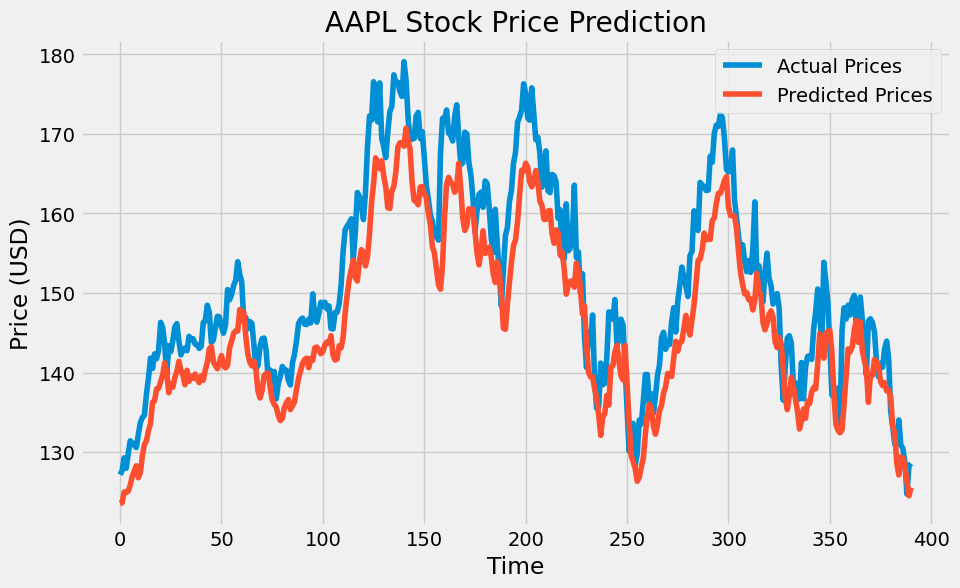

In [21]:
# Plot predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


#### Explanation:
1. **Predict Prices**: Use the trained model to predict stock prices on the test set.
2. **Rescale Predictions**: Convert normalized predictions back to actual prices.
3. **Plot Results**: Compare predicted and actual prices to evaluate model performance.


## 6. Advanced RNN Variants

### Bidirectional RNNs
- Processes sequences in both forward and backward directions.
- Captures context from both past and future.

### Stacked RNNs
- Uses multiple RNN layers to increase model capacity.
- Each layer processes the output of the previous layer.

### Attention Mechanisms
- Allows the model to focus on specific parts of the input sequence.
- Improves performance on long sequences.

---


### Applications in Real-World Projects
- **Stock Price Prediction**: Predict future stock prices based on historical data.
- **Time Series Forecasting**: Predict future values in time series data.
- **Anomaly Detection**: Identify unusual patterns in sequential data.

---

## Conclusion

### Summary
- RNNs are powerful models for sequential data.
- Advanced variants like LSTM and GRU address the vanishing gradient problem.
- RNNs have wide-ranging applications in time series, NLP, and speech recognition.

### Further Reading
- [Original RNN Paper](http://www.deeplearningbook.org/)
- [LSTM Paper](https://www.bioinf.jku.at/publications/older/2604.pdf)
- [Attention Mechanisms](https://arxiv.org/abs/1409.0473)
